# SEGUNDO PARCIAL SOCIOFÍSICA

**Nombre: Samuel Cortes Salazar**  
**Fecha: 01/10/2024**

## Enunciado:

El archivo *c_elegans.dat* contiene la matriz de adyacencia de una RED METABOLICA DEL C. ELEGANS que define un grafo no dirigido y de tamaño N = 453. Esta estructura describe una red metabólica formada por nodos, que son sustancias que están conectadas entre sí a través de enlaces, estos enlaces representan una reacción química real.
Para la red asignada, debe realizar un análisis en el cual aplique los conocimientos y herramientas analíticas demostrando su capacidad para analizar un sistema complejo mediante la ciencia de redes.
Se debe entregar un informe en archivo PDF con un título y el resto del documento (sin contar índice ni listas de tablas o figuras) no debe superar las 2.000 palabras y contener un aparte de conclusiones de máximo 200 palabras. Sus resultados pueden incluir valores numéricos, tablas, figuras que den sustento a las ideas desarrolladas en el informe. Para la evaluación, se considerará la originalidad con la que se aborde el problema.

## Solución:

Importamos las librerías que utilizaremos:

In [ ]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

Importamos el archivo con la matriz de adyacencia:

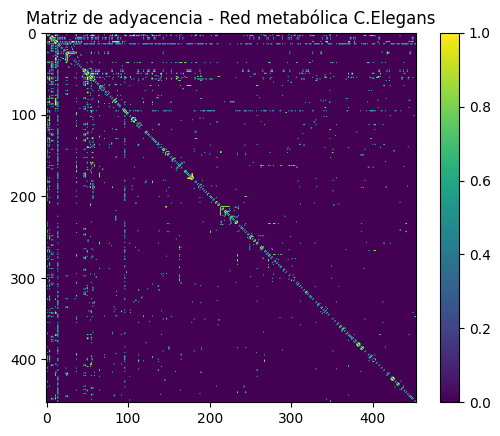

<Figure size 640x480 with 0 Axes>

In [ ]:
matA = np.loadtxt("c_elegans.dat")
plt.imshow(matA)
plt.colorbar()
plt.title("Matriz de adyacencia - Red metabólica C.Elegans")
plt.show()
plt.savefig('Matriz_C.Elegans.png', format='png', dpi=300, facecolor=plt.gcf().get_facecolor(), bbox_inches='tight')

Construimos el grafo a partir de la matriz de adyacencia:

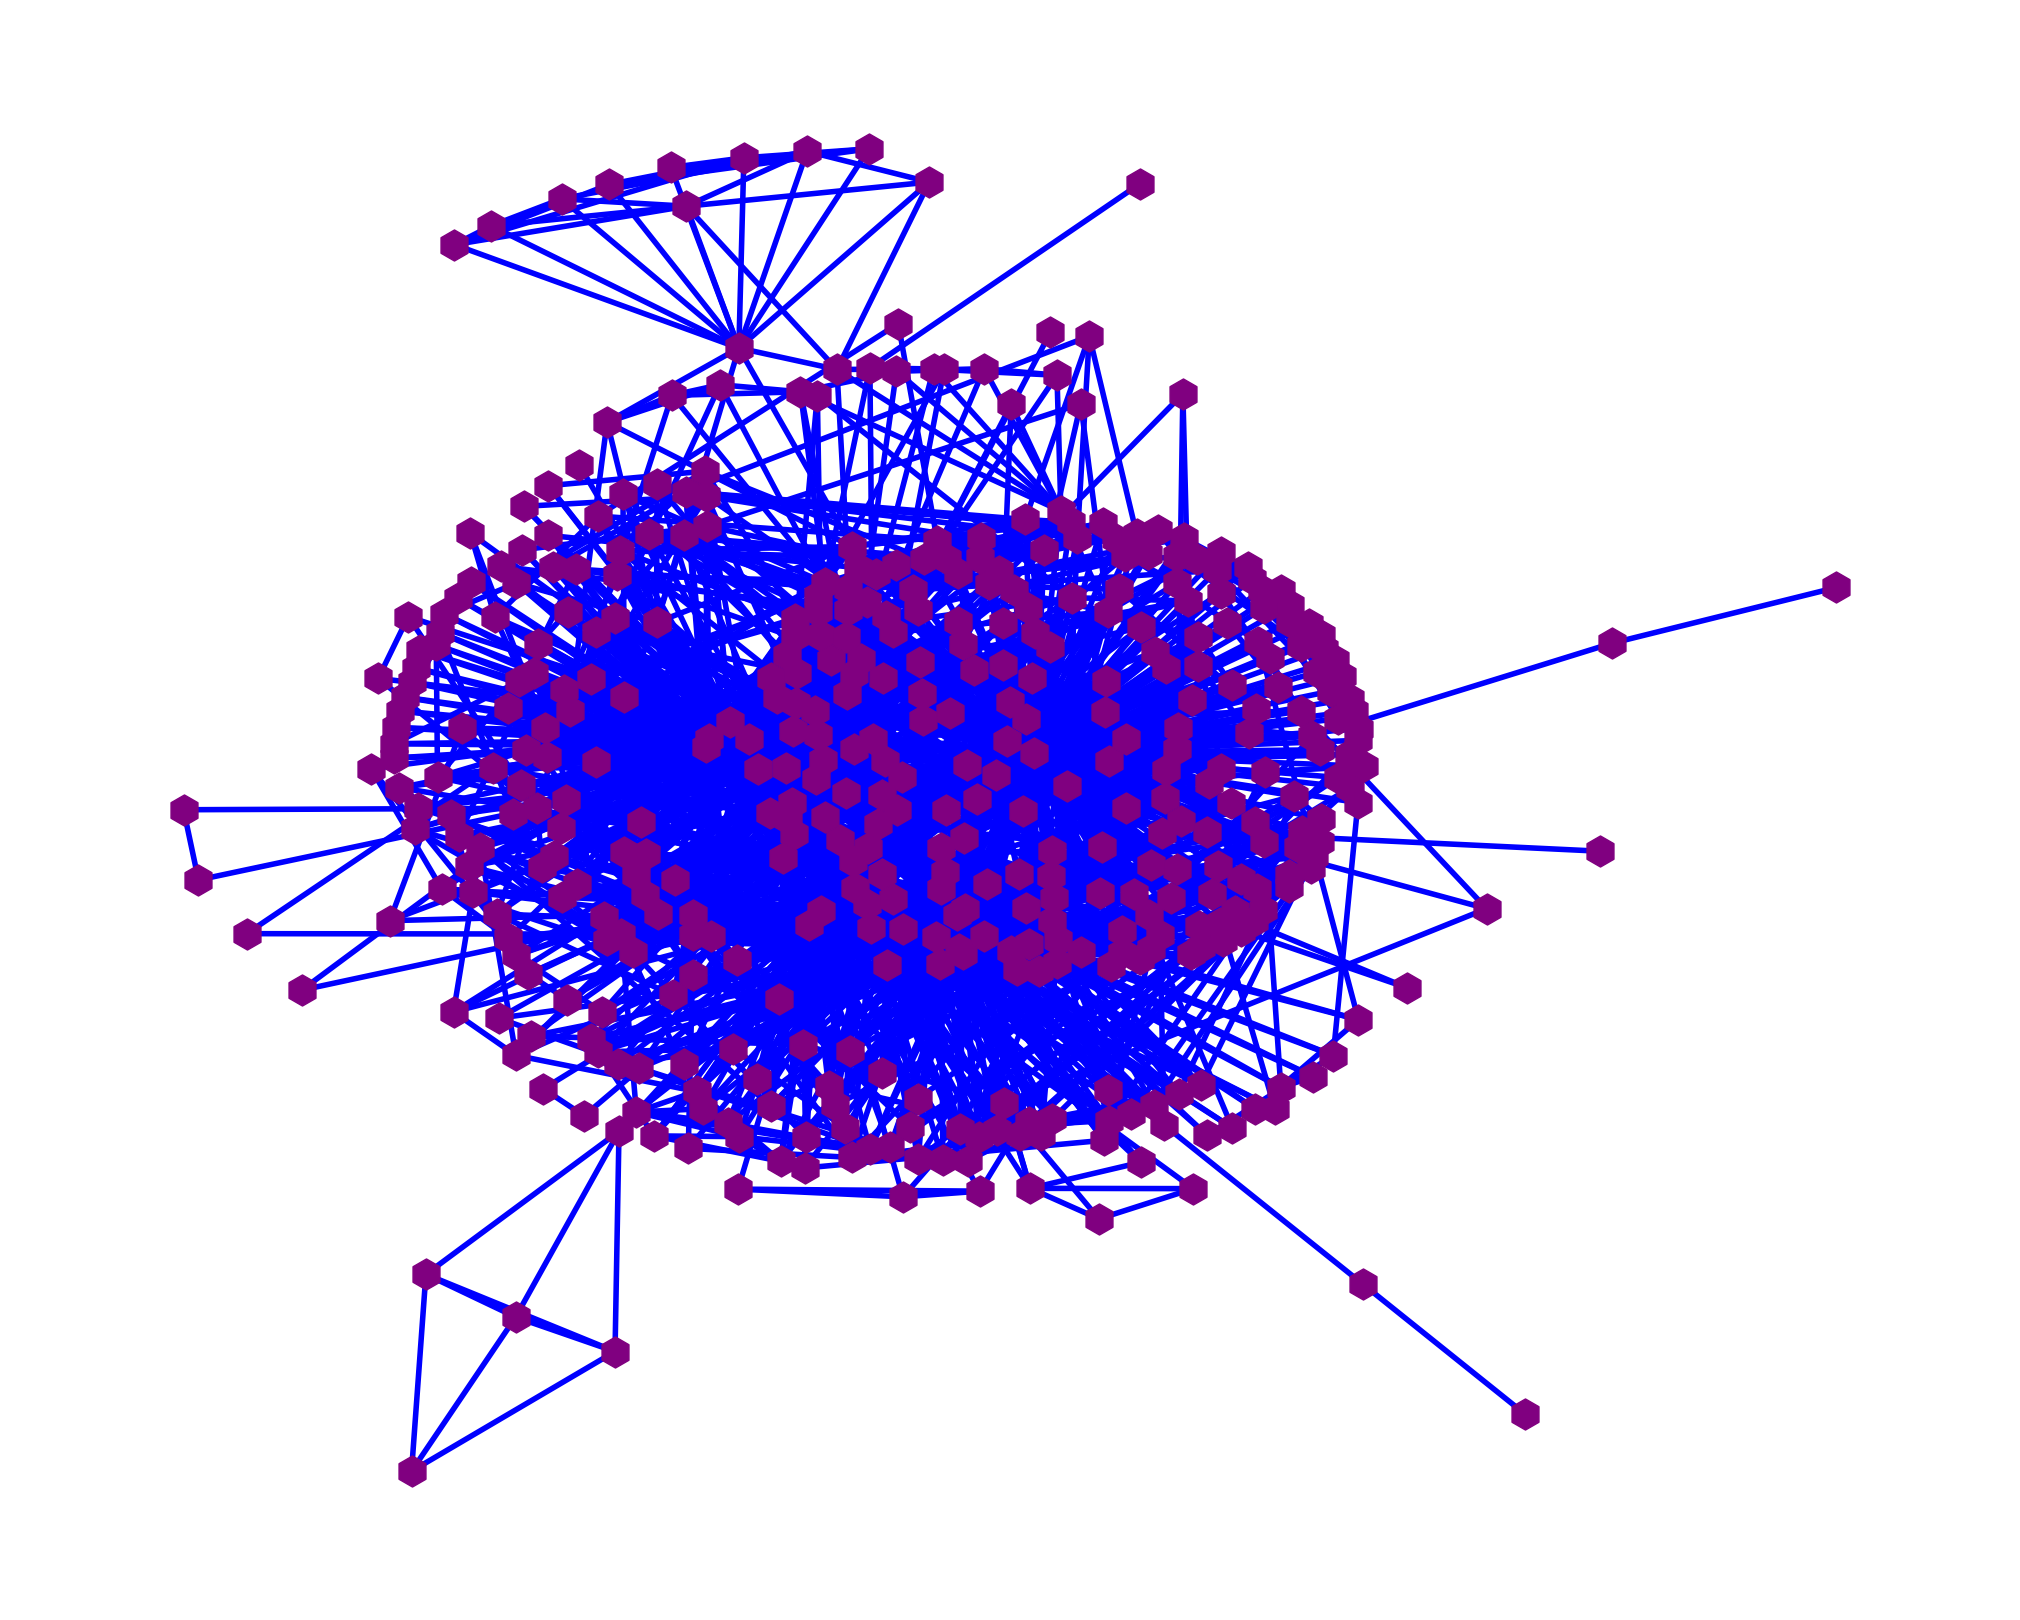

In [ ]:
G = nx.from_numpy_array(matA)
plt.figure(figsize=(20, 16))
nx.draw(G, with_labels=False, pos=nx.kamada_kawai_layout(G), node_color='purple', edge_color='blue', node_size=500,node_shape='h', width = 4)
plt.savefig('Grafo_C.Elegans.png', format='png', dpi=300, facecolor=plt.gcf().get_facecolor(), bbox_inches='tight')

Determinamos algunas propiedades topológicas de la red:

**MEDIDAS DE CENTRALIDAD**

In [ ]:
def centralidades(G):
  # Centralidad de grado
  centralidad_grado = nx.degree_centrality(G)
  # Centralidad de intermediación
  centralidad_intermediacion = nx.betweenness_centrality(G, normalized=True)
  # Centralidad de cercanía
  centralidad_cercania = nx.closeness_centrality(G)
  # Centralidad de vector propio
  try:
    centralidad_vector_propio = nx.eigenvector_centrality(G, max_iter=1000)
  except nx.PowerIterationFailedConvergence:
    print("Convergencia fallida para la centralidad de vector propio. Intentando con otra semilla.")
    centralidad_vector_propio = nx.eigenvector_centrality_numpy(G)

  centralidades = {
    'Grado': centralidad_grado,
    'Intermediación': centralidad_intermediacion,
    'Cercanía': centralidad_cercania,
    'Vector Propio': centralidad_vector_propio
  }

  return centralidades

def distribuciones_centralidades(centralidades):
  plt.figure(figsize=(20, 15))
  for i, (nombre, valores) in enumerate(centralidades.items(), 1):
    plt.subplot(2, 2, i)
    plt.hist(valores.values(), bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribución de {nombre}')
    plt.xlabel(nombre)
    plt.ylabel('Frecuencia')
    plt.savefig(f'Centralidad_{nombre}_C.Elegans.png', format='png', dpi=300, facecolor=plt.gcf().get_facecolor(), bbox_inches='tight')
    plt.clf()
  plt.tight_layout()
  plt.show()

**DENSIDAD DE LA RED**

In [ ]:
def densidad(G):
  # Densidad de la red
  densidad = nx.density(G)
  return densidad

**DISTANCIAS GEODÉSICAS**

In [ ]:
from collections import defaultdict
def distancias_geodesicas(G):
  # Promedio de distancias geodésicas
  if nx.is_connected(G):
    promedio_distancias = nx.average_shortest_path_length(G)
  else:
    # Si la red no es conexa, calcular para la componente más grande
    componentes = list(nx.connected_components(G))
    componente_gigante = G.subgraph(componentes[0]).copy()
    promedio_distancias = nx.average_shortest_path_length(componente_gigante)
  # Distribución de distancias geodésicas
  if not nx.is_connected(G):
    G = G.subgraph(componente_gigante.nodes())
  path_length_dict = dict(nx.all_pairs_shortest_path_length(G))
  distribucion_distancias = defaultdict(int)
  for source, lengths in path_length_dict.items():
    for target, length in lengths.items():
      if source != target:
        distribucion_distancias[length] += 1
  return promedio_distancias, dict(distribucion_distancias)

**COEFICIENTE DE AGRUPAMIENTO**

In [ ]:
def coeficiente_agrupamiento(G):
  # Coeficiente de agrupamiento
  clustering = nx.clustering(G)
  return clustering

**DETECCIÓN DE COMUNIDADES**

In [ ]:
from networkx.algorithms import community
def detectar_comunidades(G):
  # Algoritmo de detección de comunidades
  comunidades = community.greedy_modularity_communities(G)
  # Modularidad
  modularidad = community.modularity(G, comunidades)
  return comunidades, modularidad

Resultados:

In [ ]:
centralidades = centralidades(G)
distribuciones_centralidades(centralidades)
densidad = densidad(G)
promedio_distancias, distribucion_distancias = distancias_geodesicas(G)
clustering = coeficiente_agrupamiento(G)
clustering_promedio = nx.average_clustering(G)
comunidades, modularidad = detectar_comunidades(G)

propiedades_red = {
        'Densidad': densidad,
        'Distancia Geodésica Promedio': promedio_distancias,
        'Coeficiente de Agrupamiento Promedio': clustering_promedio,
        'Modularidad': modularidad,
        'Número de Comunidades': len(comunidades),
    }

print("PROPIEDADES DE LA RED:")
for nombre, valor in propiedades_red.items():
    print(f"{nombre}: {valor}")
print("DISTANCIAS GEODÉSICAS:")
print('Distancia: Frecuencia')
for key, value in distribucion_distancias.items():
  print(f"{key}: {value}")
print("COEFICIENTES DE AGRUPAMIENTO")
print('Nodo: Coeficiente de agrupamiento')
for key, value in clustering.items():
  print(f"{key}: {value}")

<Figure size 2000x1500 with 0 Axes>

PROPIEDADES DE LA RED:
Densidad: 0.019779640157064994
Distancia Geodésica Promedio: 2.6637851882240327
Coeficiente de Agrupamiento Promedio: 0.6464630921565053
Modularidad: 0.41333638164913883
Número de Comunidades: 11
DISTANCIAS GEODÉSICAS:
Distancia: Frecuencia
1: 4050
2: 86652
3: 92360
4: 17890
5: 3440
6: 316
7: 48
COEFICIENTES DE AGRUPAMIENTO
Nodo: Coeficiente de agrupamiento
0: 1.0
1: 0.06517393042782887
2: 1.0
3: 0.24324324324324326
4: 0.08324838600067958
5: 1.0
6: 0.08504504504504505
7: 0.8
8: 0.08504504504504505
9: 0.6
10: 0.5333333333333333
11: 0.12656641604010024
12: 0.14761904761904762
13: 0.4
14: 0.03110920403346921
15: 0.6
16: 0.6
17: 0.5333333333333333
18: 0.6
19: 0.6
20: 0.5333333333333333
21: 0.6
22: 0.6
23: 0.5333333333333333
24: 0.13825757575757575
25: 0.3717948717948718
26: 0.1425287356321839
27: 0.6
28: 0.4
29: 0.6
30: 0.6
31: 0.4
32: 0.4
33: 0.4
34: 0.4
35: 0.5714285714285714
36: 0.6111111111111112
37: 0.09933435739887353
38: 0.6
39: 0.5333333333333333
40: 0.7
41: 